In [1]:
import csv
import numpy
import matplotlib.pyplot as plt

In [2]:
train_data = numpy.loadtxt("data/galaxies_train.csv", delimiter=",", skiprows=1)
test_data = numpy.loadtxt("data/galaxies_test.csv", delimiter=",", skiprows=1)

In [3]:
X_train = train_data[:,1:]
t_train = train_data[:,0]
X_test = test_data[:,1:]
t_test = test_data[:,0]
print("Number of training instances: %i" % X_train.shape[0])
print("Number of test instances: %i" % X_test.shape[0])
print("Number of attributes: %i" % X_train.shape[1])

Number of training instances: 500
Number of test instances: 500
Number of attributes: 10


In [4]:

#Imported code from Exercise 4.1
class NearestNeighbor:
    
    def __init__(self, n_neighbors=1, dist_measure="euclidean", dist_matrix=None):
        """
        Initializes the model.
        
        Parameters
        ----------
        n_neighbors : The number of nearest neigbhors (default 1)
        dist_measure : The distance measure used (default "euclidean")
        dist_matrix : The distance matrix if needed (default "None")
        """
        
        self.n_neighbors = n_neighbors
        self.dist_measure = dist_measure
        self.dist_matrix = dist_matrix
    
    def fit(self, X, t):
        """
        Fits the nearest neighbor regression model.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]
        t : Array of length n_samples
        """ 
        
        self.X_train = X
        self.t_train = t
    
    def predict(self, X):
        """
        Computes predictions for a new set of points.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]

        Returns
        -------
        predictions : Array of length n_samples
        """         
        self.fit(X_train, t_train)
        predictions = []
        for i in range(len(X)):
            linReg = LeastWeigthedSquare(lam=1)
            closest = (self.distance(X[i]))
            closest = numpy.argsort(closest)
            self.X_train = X_train[closest[:self.n_neighbors]]
            self.t_train = t_train[closest[:self.n_neighbors]]
            linReg.fit(self.X_train, self.t_train)
            pred = linReg.predict(X_test[i])
            predictions.append(pred[0][0])
        predictions = numpy.array(predictions)
        return predictions
    def distance(self, X_row):
        distance = []
        for i in range(len(X_train)):
            distance.append(self.euclDist(X_row, X_train[i]))
        return distance
    
    def euclDist(self,X,Y):
        return numpy.sqrt(numpy.dot((X-Y).T,(X-Y)))
    def rmse(self, t, tp):
        return numpy.sqrt(numpy.mean((t-tp)**2))   
          
        
        


In [5]:
class LeastWeigthedSquare:
    def __init__ (self, lam=0):
        self.lam = lam
    # In fit i have reused/taken inspiration from the handed out material linreg.py
    # found in MAD2019_L3
    def fit (self, X, t):
        
        X = numpy.array(X).reshape((len(X), -1))
        t = numpy.array(t).reshape((len(t), 1))

        # prepend a column of ones
        ones = numpy.ones((X.shape[0], 1))
        X = numpy.concatenate((ones, X), axis=1)
        # compute weights (solve system)
        diag = self.lam * len(X) * numpy.identity(X.shape[1])
        a = numpy.dot(X.T, X) + diag
        b = numpy.dot(X.T, t)
        self.w = numpy.linalg.solve(a,b)  
    def predict(self, X):
        
        X = numpy.array(X).reshape((len(X), -1))
        X = X.T
        # prepend a column of ones
        ones = numpy.ones((X.shape[0], 1))
        X = numpy.concatenate((ones, X), axis=1)           
        # compute predictions
        predictions = numpy.dot(X, self.w)
        return predictions
        

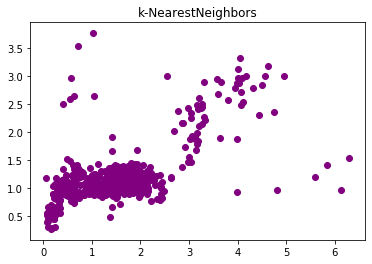

RMSE:  0.8925765347348246


In [6]:
kNearNeigh = NearestNeighbor(n_neighbors=15)
predictions = kNearNeigh.predict(X_test)
plt.figure()
plt.scatter(t_test, predictions, color='purple')
plt.title('k-NearestNeighbors')
plt.show()
print("RMSE: ", kNearNeigh.rmse(predictions, t_test))